# Decouverte des donnees

In [5]:
# importer les bibliotheques
import os # manipuler les fichiers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Collecter les noms des fichiers (datasets)
files = [file for file in os.listdir(r"/Users/user/Desktop/Python/Certificat Data Analysis Force-N/Projet Analyse des ventes d'une entreprise/Sales_Data")]
for file in files:
    print(file)

Sales_December_2019.csv
.DS_Store
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Untitled.ipynb
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
.ipynb_checkpoints
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [15]:
path = r"/Users/user/Desktop/Python/Certificat Data Analysis Force-N/Projet Analyse des ventes d'une entreprise/Sales_Data"
# creer une base de donnees vide
all_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    # rajouter le fichier a la base de donnees
    all_data = pd.concat([all_data,current_data])

print(all_data)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 1100: invalid start byte

In [21]:
donnees_janvier = pd.read_csv(path+'/Sales_January_2019.csv')
donnees_janvier
donnees_janvier.shape

(9723, 6)

In [22]:
# combiner tous les datasets en un seul dataset (all_dataset.cvs)
all_data.to_csv(path+'/all_data.csv', index=False)

In [28]:
all_data.shape

(25117, 6)

In [24]:
# les types de la bd
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [27]:
# voire les valeurs manquantes
all_data.isnull().sum()

Order ID            80
Product             80
Quantity Ordered    80
Price Each          80
Order Date          80
Purchase Address    80
dtype: int64

In [29]:
#Supprimer les valeurs manquantes
all_data = all_data.dropna(how='all')

In [30]:
all_data.shape

(25037, 6)

# Quel est le mois durant lequel nous avons realise le meilleur chiffre d'affaire ?

In [31]:
def month(x):
    return x.split('/')[0]

#month('12/30/2019 00:01')

'12'

In [32]:
all_data['Month'] = all_data['Order Date'].apply(month)
all_data

/var/folders/75/nc6v794x29qf6_75lncpt4400000gn/T/ipykernel_3720/361448962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].apply(month)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [33]:
all_data['Month'].unique()

array(['12', 'Order Date', '01'], dtype=object)

In [34]:
# Suppression de Order Date
all_data = all_data[all_data['Month']!='Order Date']

In [35]:
all_data['Month'].unique()

array(['12', '01'], dtype=object)

In [37]:
all_data.dtypes
# On remarque que Month est de type Object

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [38]:
# changer le type de Month en entier
all_data['Month'] = all_data['Month'].astype(int)
all_data.dtypes

/var/folders/75/nc6v794x29qf6_75lncpt4400000gn/T/ipykernel_3720/2193325850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype(int)


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [39]:
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data.dtypes

/var/folders/75/nc6v794x29qf6_75lncpt4400000gn/T/ipykernel_3720/756156393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].astype(float)
/var/folders/75/nc6v794x29qf6_75lncpt4400000gn/T/ipykernel_3720/756156393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)


Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [40]:
# Calcul du chiffre d'affaire
all_data['Sales'] = all_data['Price Each']*all_data['Quantity Ordered']
all_data

/var/folders/75/nc6v794x29qf6_75lncpt4400000gn/T/ipykernel_3720/2340163505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Price Each']*all_data['Quantity Ordered']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


In [41]:
# chiffre d'affaire par mois - Sales/Month
all_data.groupby('Month')['Sales'].sum()

Month
1        8670.29
12    4610626.83
Name: Sales, dtype: float64

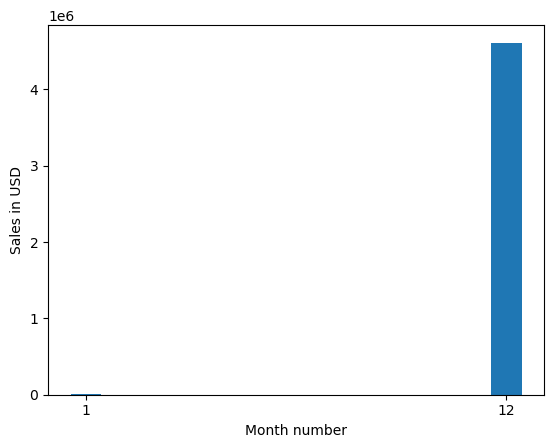

In [52]:
# Visualisation des chiffres d'affaire par mois - Sales/Month
#months = range(1,3)
months = [1,12]
plt.bar(months, all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

# Dans quelle ville nous avons enregistre le maximum de commande ?

In [53]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


In [54]:
'136 Church St, New York City, NY 10001'.split(',')

['136 Church St', ' New York City', ' NY 10001']

In [55]:
# On extrait la ville
'136 Church St, New York City, NY 10001'.split(',')[1]

' New York City'

In [56]:
# Fonction d'extraction de city
def city(x):
    return x.split(',')[1]

In [57]:
all_data['city'] = all_data['Purchase Address'].apply(city)
all_data

/var/folders/75/nc6v794x29qf6_75lncpt4400000gn/T/ipykernel_3720/1533846273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['city'] = all_data['Purchase Address'].apply(city)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas


In [60]:
# ville qui a le plus de commande
all_data.groupby('city')['city'].count()

city
 Atlanta          1988
 Austin           1350
 Boston           2698
 Dallas           2005
 Los Angeles      3894
 New York City    3408
 Portland         1648
 San Francisco    6021
 Seattle          1977
Name: city, dtype: int64

In [62]:
# index
all_data.groupby('city')['city'].count().index

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='city')

In [63]:
# values
all_data.groupby('city')['city'].count().values

array([1988, 1350, 2698, 2005, 3894, 3408, 1648, 6021, 1977])

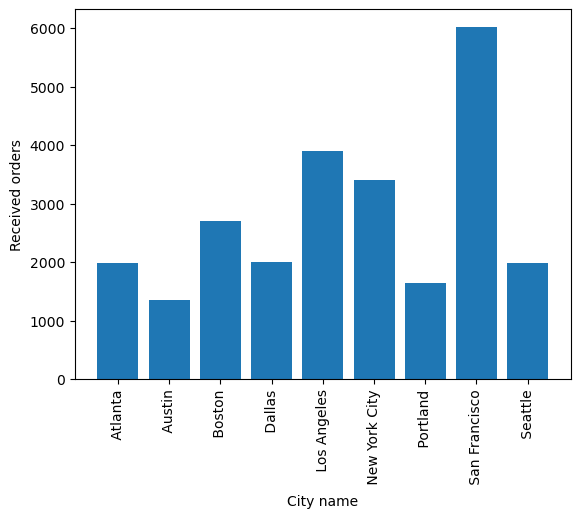

In [65]:
# Visualisation ville qui a le plus de commande
plt.bar(all_data.groupby('city')['city'].count().index, all_data.groupby('city')['city'].count().values)
plt.xticks(rotation='vertical')
plt.ylabel('Received orders')
plt.xlabel('City name')
plt.show()

# En quel moment doit-on faire une campagne publicitaire pour avoir plus de ventes ?

In [66]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas


In [67]:
# dt.hour - fonction pour extraire l'heure
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

/var/folders/75/nc6v794x29qf6_75lncpt4400000gn/T/ipykernel_3720/3662166847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour


In [68]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco,20
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles,12
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle,6
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas,10


In [69]:
# voire l'evolution des commandes
keys=[]
hours=[]
for key,hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))
hours # nbre de commandes/heure

[497,
 320,
 155,
 114,
 131,
 191,
 332,
 585,
 833,
 1127,
 1510,
 1657,
 1693,
 1641,
 1492,
 1401,
 1335,
 1431,
 1667,
 1791,
 1635,
 1416,
 1178,
 857]

Text(0, 0.5, 'Nombre des commandes')

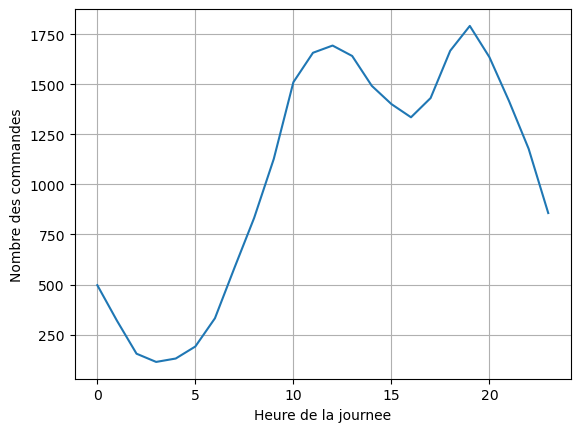

In [71]:
# Evolution des commandes
plt.grid()
plt.plot(keys, hours)
plt.xlabel('Heure de la journee')
plt.ylabel('Nombre des commandes')

# Quel produit se vend le plus ?

In [72]:
# grouper par rapport au produit
all_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   571
27in 4K Gaming Monitor         861
27in FHD Monitor               965
34in Ultrawide Monitor         849
AA Batteries (4-pack)         3718
AAA Batteries (4-pack)        4240
Apple Airpods Headphones      2079
Bose SoundSport Headphones    1825
Flatscreen TV                  665
Google Phone                   716
LG Dryer                        86
LG Washing Machine              80
Lightning Charging Cable      3089
Macbook Pro Laptop             644
ThinkPad Laptop                541
USB-C Charging Cable          3251
Vareebadd Phone                285
Wired Headphones              2748
iPhone                         908
Name: Quantity Ordered, dtype: int64

<Axes: xlabel='Product'>

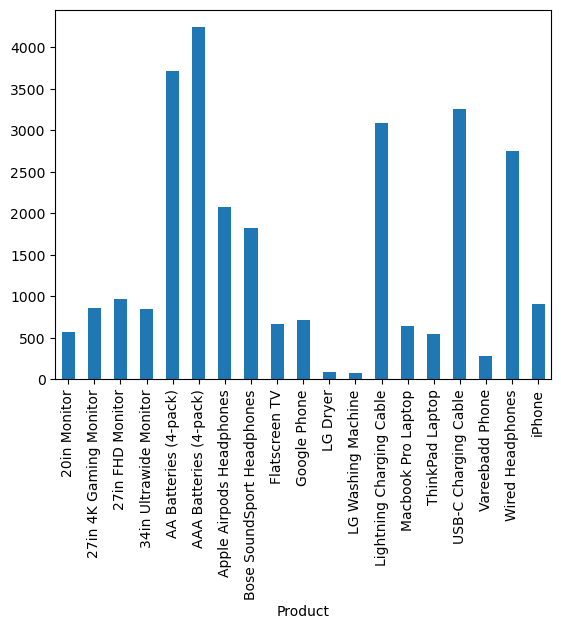

In [73]:
# grouper par rapport au produit - visualisation
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [74]:
# Examiner l'impact du prix
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [75]:
# l'impact du prix - visualisation
products = all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_data.groupby('Product')['Price Each'].mean()

/var/folders/75/nc6v794x29qf6_75lncpt4400000gn/T/ipykernel_3720/2979710049.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

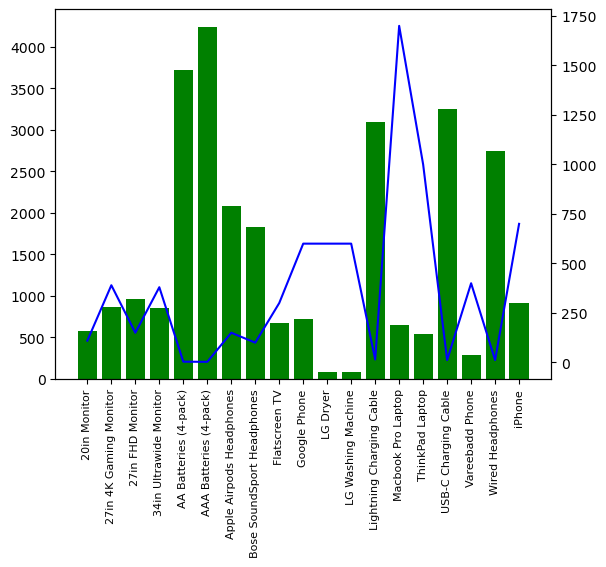

In [78]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

# Quels sont les combinaisons de produits qui se vendent le plus ?

In [79]:
# duplication des id - les produits qui ont les memes identifiants
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [80]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/var/folders/75/nc6v794x29qf6_75lncpt4400000gn/T/ipykernel_3720/2345761670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [81]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Grouped
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,"Vareebadd Phone,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
25028,319584,Wired Headphones,1,11.99,12/11/19 00:30,"537 Sunset St, Portland, OR 97035",12,11.99,Portland,0,"iPhone,Wired Headphones"
25040,319596,iPhone,1,700.00,12/01/19 08:44,"436 14th St, New York City, NY 10001",12,700.00,New York City,8,"iPhone,Lightning Charging Cable"
25041,319596,Lightning Charging Cable,1,14.95,12/01/19 08:44,"436 14th St, New York City, NY 10001",12,14.95,New York City,8,"iPhone,Lightning Charging Cable"
25076,319631,34in Ultrawide Monitor,1,379.99,12/17/19 22:35,"363 Highland St, Austin, TX 73301",12,379.99,Austin,22,"34in Ultrawide Monitor,Lightning Charging Cable"


In [82]:
df['Grouped']

16       Google Phone,USB-C Charging Cable,Bose SoundSp...
17       Google Phone,USB-C Charging Cable,Bose SoundSp...
18       Google Phone,USB-C Charging Cable,Bose SoundSp...
19       Google Phone,USB-C Charging Cable,Bose SoundSp...
36                    Vareebadd Phone,USB-C Charging Cable
                               ...                        
25028                              iPhone,Wired Headphones
25040                      iPhone,Lightning Charging Cable
25041                      iPhone,Lightning Charging Cable
25076      34in Ultrawide Monitor,Lightning Charging Cable
25077      34in Ultrawide Monitor,Lightning Charging Cable
Name: Grouped, Length: 1914, dtype: object

In [83]:
# Suppression des elements dupliques
df2 = df.drop_duplicates(subset=['Order ID'])
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Grouped
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,"Vareebadd Phone,USB-C Charging Cable"
42,295703,AA Batteries (4-pack),1,3.84,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin,12,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,iPhone,1,700.00,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston,14,"iPhone,Lightning Charging Cable"
76,295735,iPhone,1,700.00,12/22/19 18:25,"374 Lincoln St, New York City, NY 10001",12,700.00,New York City,18,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
24977,319536,Macbook Pro Laptop,1,1700.00,12/16/19 09:59,"346 Elm St, Seattle, WA 98101",12,1700.00,Seattle,9,"Macbook Pro Laptop,Wired Headphones"
24998,319556,Google Phone,1,600.00,12/22/19 08:23,"848 7th St, Austin, TX 73301",12,600.00,Austin,8,"Google Phone,Wired Headphones"
25027,319584,iPhone,1,700.00,12/11/19 00:30,"537 Sunset St, Portland, OR 97035",12,700.00,Portland,0,"iPhone,Wired Headphones"
25040,319596,iPhone,1,700.00,12/01/19 08:44,"436 14th St, New York City, NY 10001",12,700.00,New York City,8,"iPhone,Lightning Charging Cable"


In [86]:
# 5 premieres des commandes groupees
df2['Grouped'].value_counts()[0:5]

iPhone,Lightning Charging Cable         104
Google Phone,USB-C Charging Cable       101
iPhone,Wired Headphones                  54
Vareebadd Phone,USB-C Charging Cable     44
iPhone,Apple Airpods Headphones          41
Name: Grouped, dtype: int64

<Axes: ylabel='Grouped'>

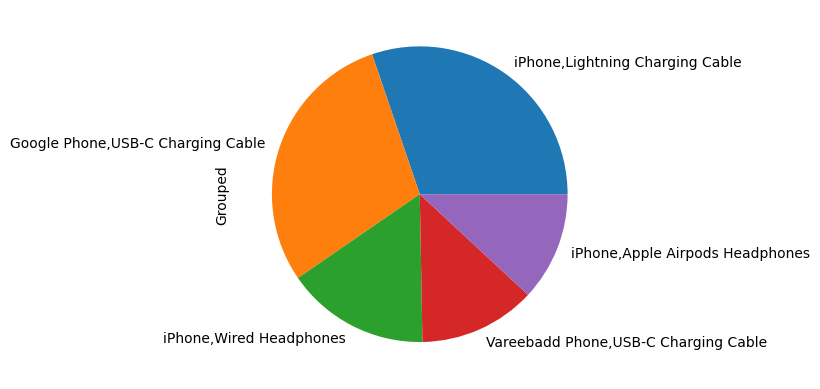

In [87]:
# 5 premieres des commandes groupees - Visualisation diagramme sectoriel
df2['Grouped'].value_counts()[0:5].plot.pie()